# SPACESHIP TITANIC
---

**IMPORTING LIBARIES**

---

In [196]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from scipy.stats import chi2_contingency 
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows',None)

**LOADING DATASET**

---

In [197]:
data = pd.read_csv('/kaggle/input/spaceship-titanic/train.csv')

In [198]:
data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [199]:
data.shape

(8693, 14)

**ANALYZING DATA /  EDA**

---

In [200]:
def summary(df):
    sum = pd.DataFrame(df.dtypes, columns=['dtypes'])
    sum['missing#'] = df.isna().sum().values
    sum['missing%'] = (df.isna().sum().values*100)/len(df)
    sum['uniques'] = df.nunique().values
    sum['count'] = df.count().values
    #sum['skew'] = df.skew().values
    desc = pd.DataFrame(df.describe().T)
    sum['min'] = desc['min']
    sum['max'] = desc['max']
    sum['mean'] = desc['mean']
    return sum

summary(data).style.background_gradient(cmap='twilight_shifted_r')

,dtypes,missing#,missing%,uniques,count,min,max,mean
PassengerId,object,0,0.000000,8693,8693,nan,nan,nan
HomePlanet,object,201,2.312205,3,8492,nan,nan,nan
CryoSleep,object,217,2.496261,2,8476,nan,nan,nan
Cabin,object,199,2.289198,6560,8494,nan,nan,nan
Destination,object,182,2.093639,3,8511,nan,nan,nan
Age,float64,179,2.059128,80,8514,0.000000,79.000000,28.827930
VIP,object,203,2.335212,2,8490,nan,nan,nan
RoomService,float64,181,2.082135,1273,8512,0.000000,14327.000000,224.687617
FoodCourt,float64,183,2.105142,1507,8510,0.000000,29813.000000,458.077203
ShoppingMall,float64,208,2.392730,1115,8485,0.000000,23492.000000,173.729169


In [201]:
data['VIP'].value_counts()

VIP
False    8291
True      199
Name: count, dtype: int64

In [202]:
data.columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name', 'Transported'],
      dtype='object')

### We drop unnecessary columns

In [203]:
data.drop(columns = ['PassengerId','Name'], inplace= True)

### We look for data imbalance

In [204]:
data['Transported'].value_counts()

Transported
True     4378
False    4315
Name: count, dtype: int64

> * We see that data is balanced 

### We analyze the null values

In [205]:
data.isnull().sum()

HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Transported       0
dtype: int64

In [206]:
data['Cabin'].sample(100)

1763     G/305/P
7157     B/289/S
2288     F/511/P
1971     G/335/S
7229    F/1472/S
1897     F/399/P
5872    F/1283/P
3000     E/202/P
2184     F/474/P
2185     F/475/P
2496     G/426/S
1397     F/282/S
7618    G/1314/P
532       G/83/S
7792    F/1711/P
6789    G/1155/P
7350     C/293/S
1085     F/218/S
3587     F/729/S
2301     F/512/P
2017     G/347/P
422       G/72/P
6174    F/1350/P
3026     C/123/S
7538    F/1664/P
8064     E/566/S
7728    G/1339/P
3121     G/550/P
8276    G/1430/P
5762    F/1166/S
4268     F/936/P
4872     E/325/P
471       B/19/S
2006     E/130/P
2016     F/426/P
252       G/45/P
781      F/154/S
2317      C/89/S
2034     G/348/S
1213      B/55/S
4565       T/2/S
512       F/98/S
7364    F/1634/P
2008     F/419/S
7104    G/1228/S
604      F/135/P
3323     F/739/P
11         B/1/P
4699    F/1021/P
2229     E/142/P
7601     C/302/S
4563     G/782/P
1769     F/377/P
4535     F/981/P
6806     C/233/P
2837     G/499/P
2248     F/492/P
4150     G/729/P
7087    G/1225

In [207]:
data['Cabin1'] = data['Cabin'].str[0]

In [208]:
data['Cabin2'] = data['Cabin'].str[2: -2]

In [209]:
data['Cabin3'] = data['Cabin'].str[-1]

In [210]:
data.drop(columns=['Cabin'], inplace=True)

### Analyzing each column and treating it accordingly

In [211]:
dataviz = data.copy()

In [212]:
dataviz.fillna('Null', inplace = True)

<Axes: xlabel='Transported', ylabel='count'>

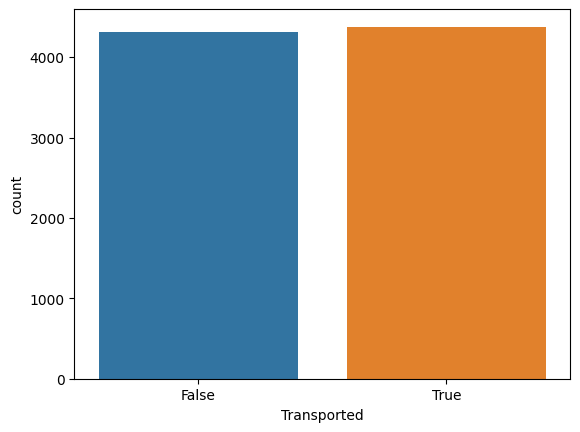

In [213]:
sns.countplot(x =dataviz['Transported'])

<Axes: xlabel='HomePlanet', ylabel='count'>

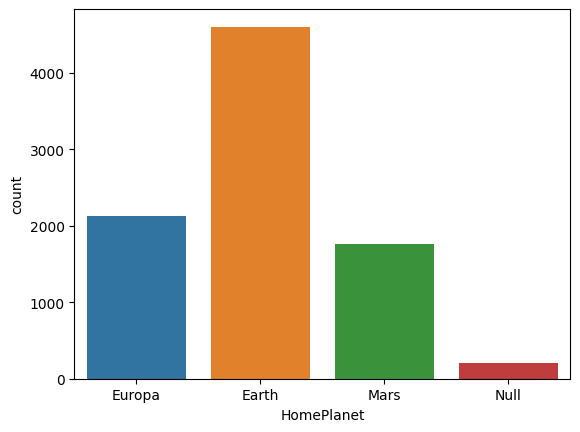

In [214]:
sns.countplot(x =dataviz['HomePlanet'])

> * We will fill null values in Homeplanet with mode

In [215]:
data['HomePlanet'].fillna(data['HomePlanet'].mode()[0], inplace=True)

<Axes: xlabel='CryoSleep', ylabel='count'>

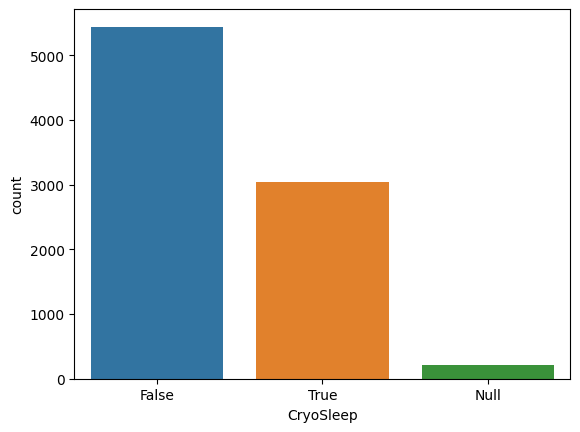

In [216]:
sns.countplot(x =dataviz['CryoSleep'])

> * We will fill Cryosleep with mode

In [217]:
data['CryoSleep'].fillna(data['CryoSleep'].mode()[0], inplace=True)

<Axes: xlabel='Destination', ylabel='count'>

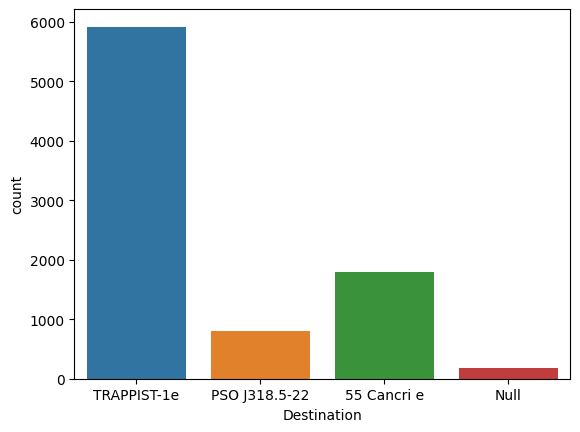

In [218]:
sns.countplot(x=dataviz['Destination'])

> * We will do mode fill for Destination

In [219]:
data['Destination'].fillna(data['Destination'].mode()[0], inplace=True)

In [220]:
dataviz['VIP'].nunique()

3

<Axes: xlabel='VIP', ylabel='count'>

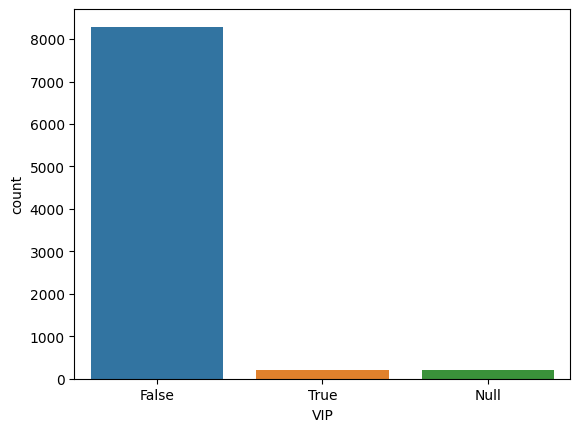

In [221]:
sns.countplot(x=dataviz['VIP'])

> * Splitting the Cabin column into three to process them separately

<Axes: xlabel='Cabin1', ylabel='count'>

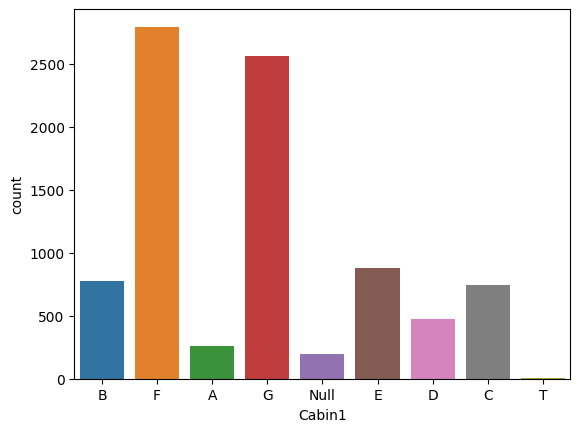

In [222]:
sns.countplot(x =dataviz['Cabin1'])

In [223]:
dataviz['Cabin1'].value_counts()

Cabin1
F       2794
G       2559
E        876
B        779
C        747
D        478
A        256
Null     199
T          5
Name: count, dtype: int64

In [224]:
data['Cabin1'].fillna(data['Cabin1'].mode()[0], inplace=True)

<Axes: xlabel='Cabin3', ylabel='count'>

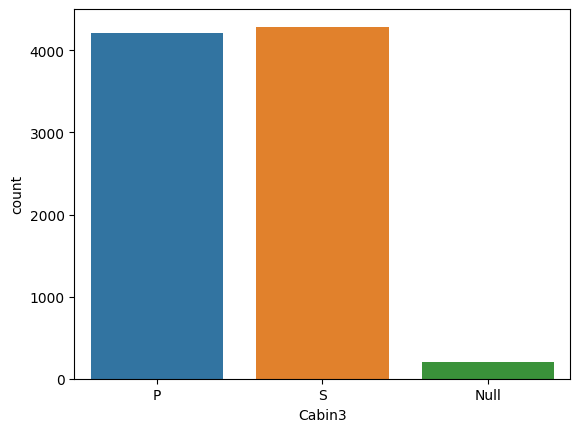

In [225]:
sns.countplot(x =dataviz['Cabin3'])

In [226]:
data['Cabin3'].fillna(data['Cabin3'].mode()[0], inplace=True)

In [227]:
data['VIP'].fillna(data['VIP'].mode()[0], inplace=True)

In [228]:
data['Cabin2'].fillna(data['Cabin2'].mode()[0], inplace=True)

> * Treating the null values for the float datatype

In [229]:
data.isnull().sum()

HomePlanet        0
CryoSleep         0
Destination       0
Age             179
VIP               0
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Transported       0
Cabin1            0
Cabin2            0
Cabin3            0
dtype: int64

In [230]:
data['Age'].interpolate(method='linear', inplace=True)

In [231]:
data['RoomService'].interpolate(method='linear', inplace=True)

In [232]:
data['FoodCourt'].interpolate(method='linear', inplace=True)

In [233]:
data['ShoppingMall'].interpolate(method='linear', inplace=True)

In [234]:
data['Spa'].interpolate(method='linear', inplace=True)

In [235]:
data['VRDeck'].interpolate(method='linear', inplace=True)

In [236]:
data.isnull().sum()

HomePlanet      0
CryoSleep       0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Transported     0
Cabin1          0
Cabin2          0
Cabin3          0
dtype: int64

**Encoding**

---

In [237]:
summary(data).style.background_gradient(cmap='twilight_shifted_r')

,dtypes,missing#,missing%,uniques,count,min,max,mean
HomePlanet,object,0,0.000000,3,8693,nan,nan,nan
CryoSleep,bool,0,0.000000,2,8693,nan,nan,nan
Destination,object,0,0.000000,3,8693,nan,nan,nan
Age,float64,0,0.000000,119,8693,0.000000,79.000000,28.830726
VIP,bool,0,0.000000,2,8693,nan,nan,nan
RoomService,float64,0,0.000000,1344,8693,0.000000,14327.000000,225.138445
FoodCourt,float64,0,0.000000,1577,8693,0.000000,29813.000000,458.611872
ShoppingMall,float64,0,0.000000,1177,8693,0.000000,23492.000000,172.246175
Spa,float64,0,0.000000,1397,8693,0.000000,22408.000000,312.480674
VRDeck,float64,0,0.000000,1356,8693,0.000000,24133.000000,303.895836


> * We apply Label encoder for the following columns

In [238]:
columns_label = ['HomePlanet', 'CryoSleep', 'Destination', 'VIP', 'Cabin3', 'Transported']

In [239]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for column in columns_label:
    data[column] = le.fit_transform(data[column])

In [240]:
data = pd.get_dummies(data, columns=['Cabin1'])

In [241]:
data.shape

(8693, 21)

**Feature selection**

---

In [242]:
y = data['Transported']
x = data.drop(columns=['Transported'])

In [243]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=123)

In [244]:
x_train = pd.DataFrame(x_train, columns = x.columns)
from sklearn.feature_selection import SelectFromModel
selectt = SelectFromModel(RandomForestClassifier(n_estimators=500, 
                             min_samples_split=4,
                             max_depth=40,
                             criterion='entropy',
                             verbose =1))
selectt.fit(x_train, y_train)
selectedfeats= x_train.columns[(selectt.get_support())]
print(len(selectedfeats))
print(selectedfeats)

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.6s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    2.5s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    5.7s


8
Index(['CryoSleep', 'Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa',
       'VRDeck', 'Cabin2'],
      dtype='object')


In [245]:
x = data.loc[:, ['CryoSleep', 'Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa',
       'VRDeck', 'Cabin2']]

In [246]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=123)

**APPLYING MODELS**

---

In [247]:
dtree = DecisionTreeClassifier()
rf = RandomForestClassifier()
gb = GradientBoostingClassifier()
ada = AdaBoostClassifier()
knn = KNeighborsClassifier()

In [248]:
dtree.fit(x_train, y_train)
rf.fit(x_train, y_train)
gb.fit(x_train, y_train)
ada.fit(x_train, y_train)
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [249]:
pdtreetr = dtree.predict(x_train)
pdtreete = dtree.predict(x_test)

prftr = rf.predict(x_train)
prfte = rf.predict(x_test)

pgbtr = gb.predict(x_train)
pgbte = gb.predict(x_test)

padatr = ada.predict(x_train)
padate = ada.predict(x_test)

pknntr = knn.predict(x_train)
pknnte = knn.predict(x_test)

In [250]:
def acc_report(actual,predicted):
    acc_score=accuracy_score(actual,predicted)
    cm_matrix=confusion_matrix(actual,predicted)
    class_rep=classification_report(actual,predicted)
    print('the accuracy of tha model is ',acc_score)
    print(cm_matrix)
    print(class_rep)

In [251]:
print(acc_report(y_train, pdtreetr))
print(acc_report(y_test, pdtreete))

the accuracy of tha model is  0.9961173425366695
[[3459    5]
 [  22 3468]]
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      3464
           1       1.00      0.99      1.00      3490

    accuracy                           1.00      6954
   macro avg       1.00      1.00      1.00      6954
weighted avg       1.00      1.00      1.00      6954

None
the accuracy of tha model is  0.7147786083956297
[[596 255]
 [241 647]]
              precision    recall  f1-score   support

           0       0.71      0.70      0.71       851
           1       0.72      0.73      0.72       888

    accuracy                           0.71      1739
   macro avg       0.71      0.71      0.71      1739
weighted avg       0.71      0.71      0.71      1739

None


In [252]:
print(acc_report(y_train, prftr))
print(acc_report(y_test, prfte))

the accuracy of tha model is  0.995973540408398
[[3441   23]
 [   5 3485]]
              precision    recall  f1-score   support

           0       1.00      0.99      1.00      3464
           1       0.99      1.00      1.00      3490

    accuracy                           1.00      6954
   macro avg       1.00      1.00      1.00      6954
weighted avg       1.00      1.00      1.00      6954

None
the accuracy of tha model is  0.7883841288096607
[[677 174]
 [194 694]]
              precision    recall  f1-score   support

           0       0.78      0.80      0.79       851
           1       0.80      0.78      0.79       888

    accuracy                           0.79      1739
   macro avg       0.79      0.79      0.79      1739
weighted avg       0.79      0.79      0.79      1739

None


In [253]:
print(acc_report(y_train, pgbtr))
print(acc_report(y_test, pgbte))

the accuracy of tha model is  0.8120506183491516
[[2648  816]
 [ 491 2999]]
              precision    recall  f1-score   support

           0       0.84      0.76      0.80      3464
           1       0.79      0.86      0.82      3490

    accuracy                           0.81      6954
   macro avg       0.81      0.81      0.81      6954
weighted avg       0.81      0.81      0.81      6954

None
the accuracy of tha model is  0.8033352501437608
[[636 215]
 [127 761]]
              precision    recall  f1-score   support

           0       0.83      0.75      0.79       851
           1       0.78      0.86      0.82       888

    accuracy                           0.80      1739
   macro avg       0.81      0.80      0.80      1739
weighted avg       0.81      0.80      0.80      1739

None


In [254]:
print(acc_report(y_train, padatr))
print(acc_report(y_test, padate))

the accuracy of tha model is  0.7958009778544722
[[2646  818]
 [ 602 2888]]
              precision    recall  f1-score   support

           0       0.81      0.76      0.79      3464
           1       0.78      0.83      0.80      3490

    accuracy                           0.80      6954
   macro avg       0.80      0.80      0.80      6954
weighted avg       0.80      0.80      0.80      6954

None
the accuracy of tha model is  0.7998849913743531
[[639 212]
 [136 752]]
              precision    recall  f1-score   support

           0       0.82      0.75      0.79       851
           1       0.78      0.85      0.81       888

    accuracy                           0.80      1739
   macro avg       0.80      0.80      0.80      1739
weighted avg       0.80      0.80      0.80      1739

None


In [255]:
print(acc_report(y_train, pknntr))
print(acc_report(y_test, pknnte))

the accuracy of tha model is  0.817083692838654
[[2745  719]
 [ 553 2937]]
              precision    recall  f1-score   support

           0       0.83      0.79      0.81      3464
           1       0.80      0.84      0.82      3490

    accuracy                           0.82      6954
   macro avg       0.82      0.82      0.82      6954
weighted avg       0.82      0.82      0.82      6954

None
the accuracy of tha model is  0.7722829212190915
[[617 234]
 [162 726]]
              precision    recall  f1-score   support

           0       0.79      0.73      0.76       851
           1       0.76      0.82      0.79       888

    accuracy                           0.77      1739
   macro avg       0.77      0.77      0.77      1739
weighted avg       0.77      0.77      0.77      1739

None


**TEST DATA**

---

In [256]:
test = pd.read_csv('/kaggle/input/spaceship-titanic/test.csv')

In [257]:
test.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [258]:
test.drop(columns=['PassengerId', 'Name', 'VIP'], inplace = True)

In [259]:
test.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,Earth,True,G/3/S,TRAPPIST-1e,27.0,0.0,0.0,0.0,0.0,0.0
1,Earth,False,F/4/S,TRAPPIST-1e,19.0,0.0,9.0,0.0,2823.0,0.0
2,Europa,True,C/0/S,55 Cancri e,31.0,0.0,0.0,0.0,0.0,0.0
3,Europa,False,C/1/S,TRAPPIST-1e,38.0,0.0,6652.0,0.0,181.0,585.0
4,Earth,False,F/5/S,TRAPPIST-1e,20.0,10.0,0.0,635.0,0.0,0.0


In [260]:
test.isnull().sum()

HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
dtype: int64

In [261]:
test['Cabin1'] = test['Cabin'].str[0]
test['Cabin2'] = test['Cabin'].str[2: -2]
test['Cabin3'] = test['Cabin'].str[-1]

In [262]:
test.drop(columns=['Cabin'], inplace=True)

In [263]:
summary(test).style.background_gradient(cmap='twilight_shifted_r')

,dtypes,missing#,missing%,uniques,count,min,max,mean
HomePlanet,object,87,2.034136,3,4190,nan,nan,nan
CryoSleep,object,93,2.174421,2,4184,nan,nan,nan
Destination,object,92,2.151040,3,4185,nan,nan,nan
Age,float64,91,2.127660,79,4186,0.000000,79.000000,28.658146
RoomService,float64,82,1.917232,842,4195,0.000000,11567.000000,219.266269
FoodCourt,float64,106,2.478373,902,4171,0.000000,25273.000000,439.484296
ShoppingMall,float64,98,2.291326,715,4179,0.000000,8292.000000,177.295525
Spa,float64,101,2.361468,833,4176,0.000000,19844.000000,303.052443
VRDeck,float64,80,1.870470,796,4197,0.000000,22272.000000,310.710031
Cabin1,object,100,2.338087,8,4177,nan,nan,nan


In [264]:
columns_mode = ['HomePlanet', 'CryoSleep', 'Destination', 'Cabin1', 'Cabin2', 'Cabin3']
for column in columns_mode:
    test[column].fillna(test[column].mode()[0], inplace=True)

In [265]:
columns_interp = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
for column in columns_interp:
    test[column].interpolate(method='linear', inplace=True)

In [266]:
test.isnull().sum()

HomePlanet      0
CryoSleep       0
Destination     0
Age             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Cabin1          0
Cabin2          0
Cabin3          0
dtype: int64

In [267]:
columns_label = ['HomePlanet', 'CryoSleep', 'Destination', 'Cabin3']
for column in columns_label:
    test[column] = le.fit_transform(test[column])

In [268]:
test = pd.get_dummies(test, columns=['Cabin1'])

In [269]:
test = test.loc[:, ['CryoSleep', 'Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa',
       'VRDeck', 'Cabin2']]

**Submission**

---

In [270]:
submission = pd.read_csv('/kaggle/input/spaceship-titanic/sample_submission.csv')

In [271]:
submission.head()

,PassengerId,Transported
0,0013_01,False
1,0018_01,False
2,0019_01,False
3,0021_01,False
4,0023_01,False


In [272]:
test2 = pd.read_csv('/kaggle/input/spaceship-titanic/test.csv')

In [273]:
submission['PassengerId'] = test2['PassengerId']

In [274]:
preds = gb.predict(test)

In [275]:
submission['Transported'] = preds

In [276]:
submission.head()

,PassengerId,Transported
0,0013_01,1
1,0018_01,0
2,0019_01,1
3,0021_01,1
4,0023_01,1


In [277]:
submission['Transported'] = submission['Transported'].astype(bool)

In [278]:
submission.head()

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,True


In [280]:
file = 'output.csv'
submission.to_csv(file, index=False)